In [34]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from datetime import datetime
from glob import glob

In [35]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/ERT_sump/'
ddir="//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/"

In [212]:
data2024august = ert.load(ddir + '16Aug/k38_old_125cm_flipped.dat')
#data2024june = ert.load(dir + 'mehriban/JuliusKunz/Kamik_WS_200V_125cm_topo.Dat')
#data2023 = ert.load(dir + 'mehriban/10_Aug_KamikF38/res2dinv_inputs/WS_rec_ele_nogps_noerror.Dat')
data2024june = ert.load(ddir+ '16Aug/k38_old_125cm_2024jun.txt')
data2023 = ert.load(ddir+'16Aug/k38_old_125cm_2023aug.txt')
data2024_long = ert.load(dir + 'mehriban/JuliusKunz/Kamik_WS_200V_250cm.Dat')
kamik = [data2023, data2024june, data2024august]

In [213]:
def geom_error(data):
    # Set sensor positions
    #data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
    data.remove(data['rhoa'] < 0)
    data['k'] = ert.createGeometricFactors(data, numerical=True)
    mgr = ert.ERTManager(sr=False)
    k0 = ert.createGeometricFactors(data)
    ert.showData(data, vals=k0/data['k'], label='Topography effect')
    data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
    data.remove(data['err'] > 0.06)
    #ert.show(data, data['err'])


    return data, mgr, k0


23/09/24 - 13:51:11 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (4.3s x 1): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\1996100753945848742
23/09/24 - 13:51:11 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 1): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\4830894157490977068
23/09/24 - 13:51:11 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (3.2s x 1): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\3665239150159996459
23/09/24 - 13:51:11 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 1): C:\Users\mealiy001\AppData\Roaming\py

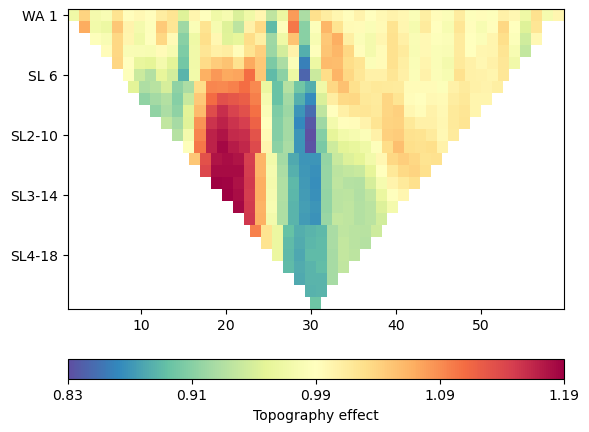

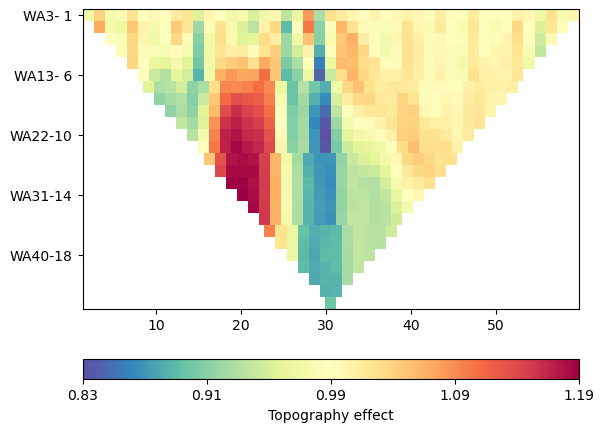

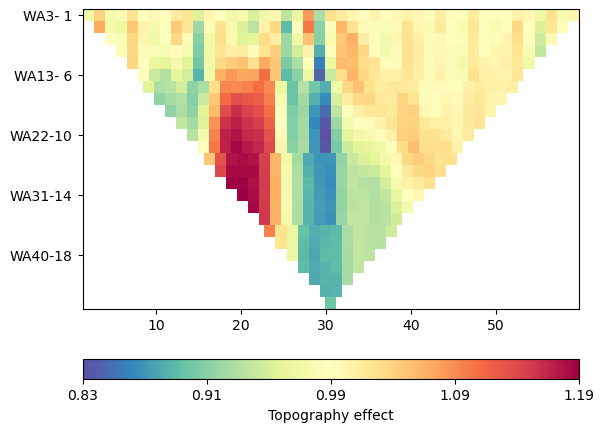

In [214]:

for item in kamik:
 geom_error(item)

#kamik[2].remove(kamik[2]['rhoa'] < 0)
#kamik[2]['k'] = ert.createGeometricFactors(kamik[2], numerical=True)
#mgr = ert.ERTManager(sr=False)
#k0 = ert.createGeometricFactors(kamik[2])
#ert.showData(kamik[2], vals=k0/kamik[2]['k'], label='Topography effect')
#kamik[2]['err'] = ert.estimateError(kamik[2], relativeError=0.03, absoluteUError=5e-5)

#ert.show(kamik[2], kamik[2]['err'])


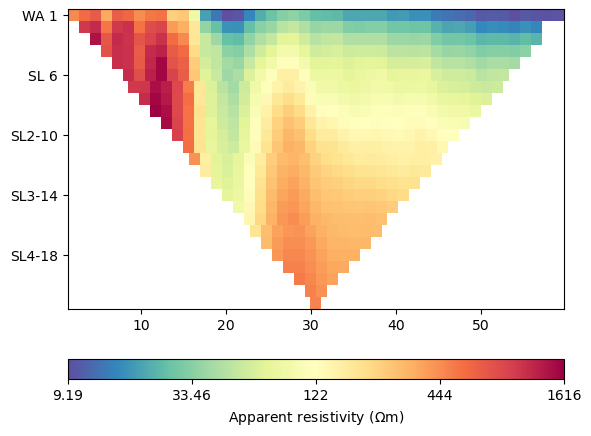

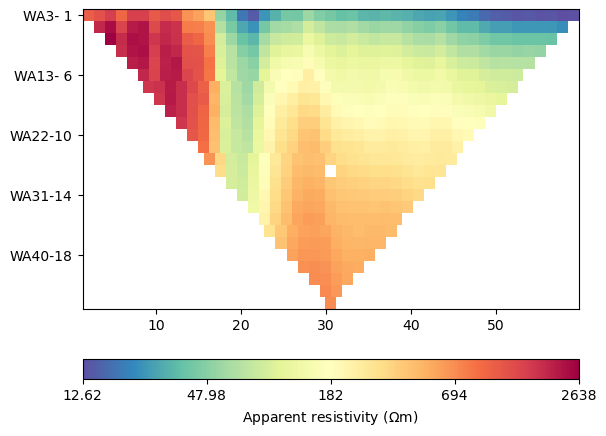

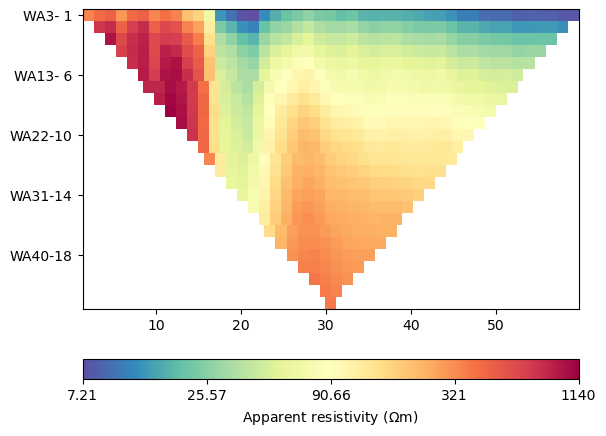

In [215]:
for item in kamik:
    ert.showData(item)

23/09/24 - 13:51:24 - pyGIMLi - INFO - Found 2 regions.
23/09/24 - 13:51:24 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
23/09/24 - 13:51:24 - pyGIMLi - INFO - Found 2 regions.
23/09/24 - 13:51:24 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
23/09/24 - 13:51:24 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/09/24 - 13:51:24 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
23/09/24 - 13:51:24 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2393 Cells: 4440 Boundaries: 3502
23/09/24 - 13:51:24 - pyGIMLi - INFO - Use median(data values)=124.4685
23/09/24 - 13:51:24 - pyGIMLi - INFO - Created startmodel from forward operator: 901, min/max=124.468500/124.468500
23/09/24 - 13:51:24 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000015CADC1D490>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000015C6A12A020>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000015CA9038200>
min/max (data): 9.19/1616
min/max (error): 3%/3.21%
min/max (start model): 124/124
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1400.49
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  168.61 (dPhi = 87.74%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  103.21 (dPhi = 38.63%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   56.76 (dPhi = 44.07%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    3.04 (dPhi = 90.29%) lam: 2

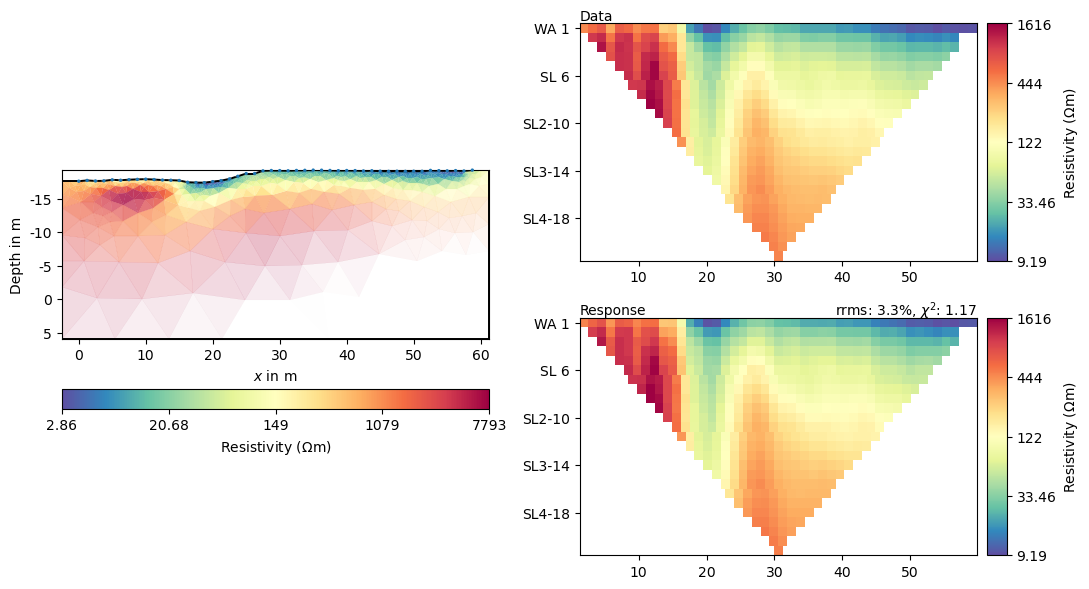

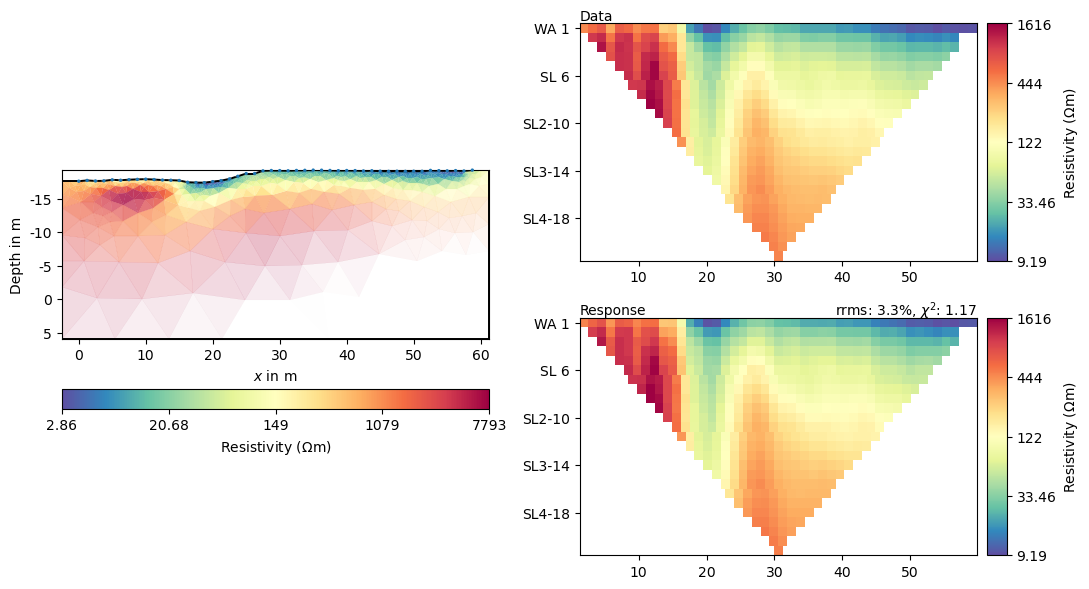

In [216]:
mgr = ert.ERTManager(kamik[0])
mgr.invert(kamik[0], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()

23/09/24 - 13:52:15 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2023\ERTManager


Path //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2023\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2023\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

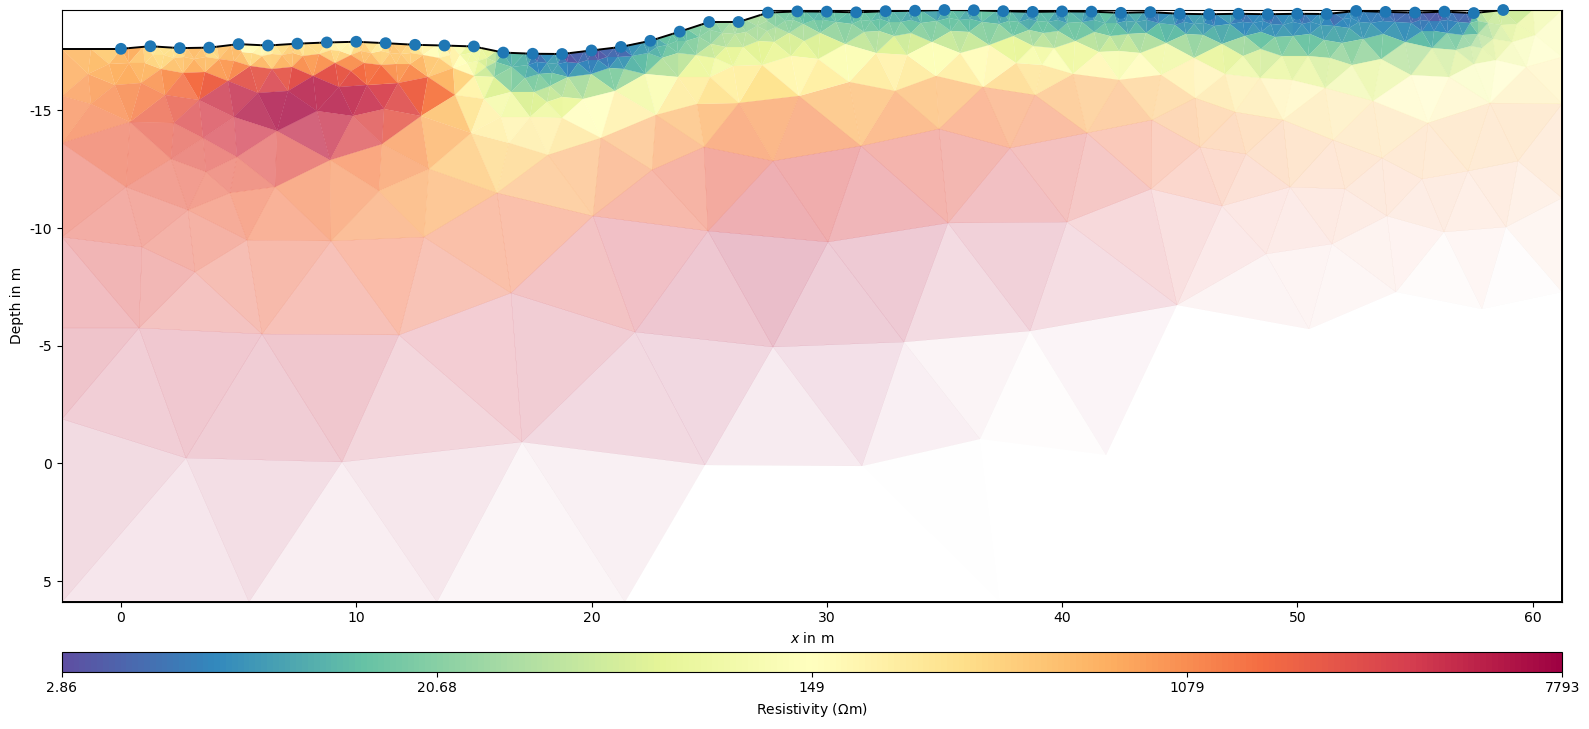

In [217]:
mgr.saveResult(ddir+ 'all_inversions/k38_ws_2023')

23/09/24 - 13:52:35 - pyGIMLi - INFO - Found 2 regions.
23/09/24 - 13:52:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/09/24 - 13:52:35 - pyGIMLi - INFO - Found 2 regions.
23/09/24 - 13:52:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
23/09/24 - 13:52:35 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/09/24 - 13:52:35 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
23/09/24 - 13:52:35 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2393 Cells: 4440 Boundaries: 3502
23/09/24 - 13:52:35 - pyGIMLi - INFO - Use median(data values)=200.375
23/09/24 - 13:52:35 - pyGIMLi - INFO - Created startmodel from forward operator: 901, min/max=200.375000/200.375000
23/09/24 - 13:52:35 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000015C881A2020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000015C54281D50>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000015C6F7DAFF0>
min/max (data): 12.62/2638
min/max (error): 3%/3.16%
min/max (start model): 200/200
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1486.87
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  178.62 (dPhi = 87.79%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  100.22 (dPhi = 43.70%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   25.80 (dPhi = 72.42%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.04 (dPhi = 83.25%) lam: 

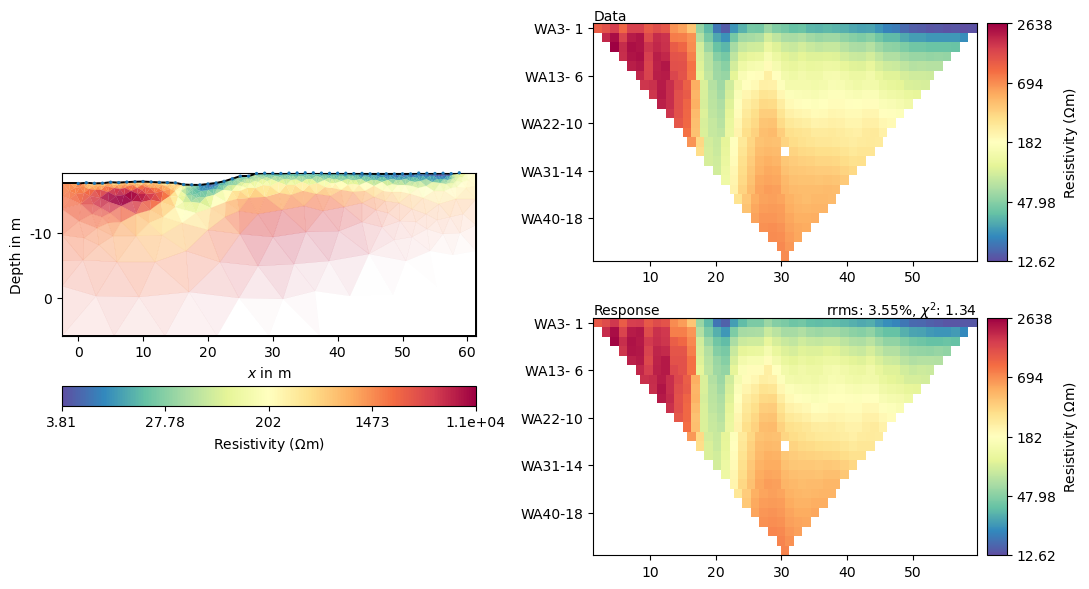

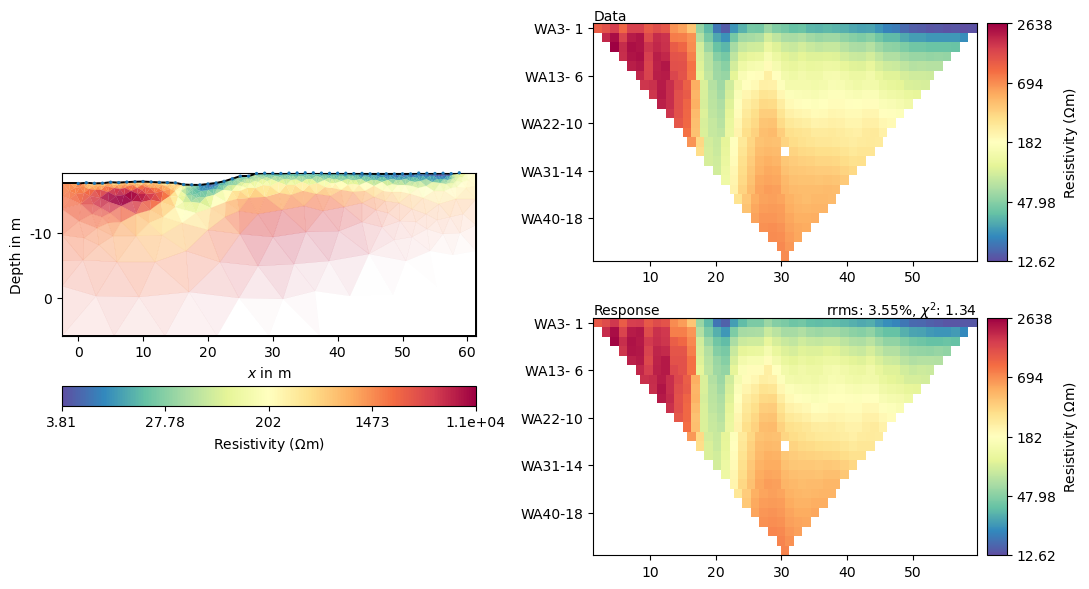

In [218]:
mgr = ert.ERTManager(item)
mgr.invert(kamik[1], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()


23/09/24 - 13:53:20 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2024june\ERTManager


Path //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2024june\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2024june\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

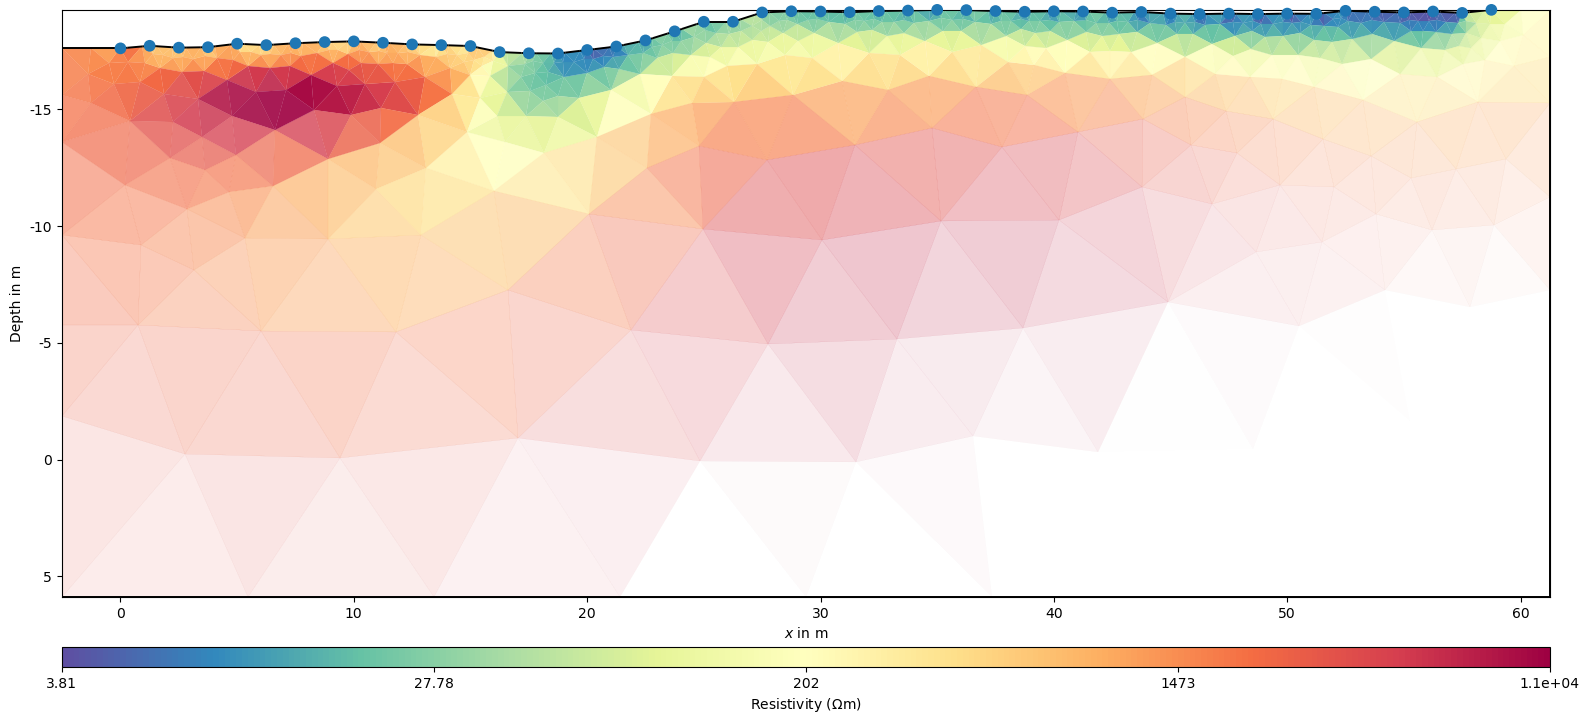

In [219]:
mgr.saveResult(ddir+ 'all_inversions/k38_ws_2024june')

23/09/24 - 13:53:34 - pyGIMLi - INFO - Found 2 regions.
23/09/24 - 13:53:34 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/09/24 - 13:53:34 - pyGIMLi - INFO - Found 2 regions.
23/09/24 - 13:53:34 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
23/09/24 - 13:53:34 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/09/24 - 13:53:34 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
23/09/24 - 13:53:34 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2393 Cells: 4440 Boundaries: 3502
23/09/24 - 13:53:34 - pyGIMLi - INFO - Use median(data values)=104.305
23/09/24 - 13:53:34 - pyGIMLi - INFO - Created startmodel from forward operator: 901, min/max=104.305000/104.305000
23/09/24 - 13:53:34 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000015CAEC6BAB0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000015CA9309670>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000015C6E3598C0>
min/max (data): 7.21/1140
min/max (error): 3%/3.25%
min/max (start model): 104/104
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1328.14
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  162.46 (dPhi = 87.54%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  100.24 (dPhi = 38.12%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   53.82 (dPhi = 45.40%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.91 (dPhi = 89.87%) lam: 2

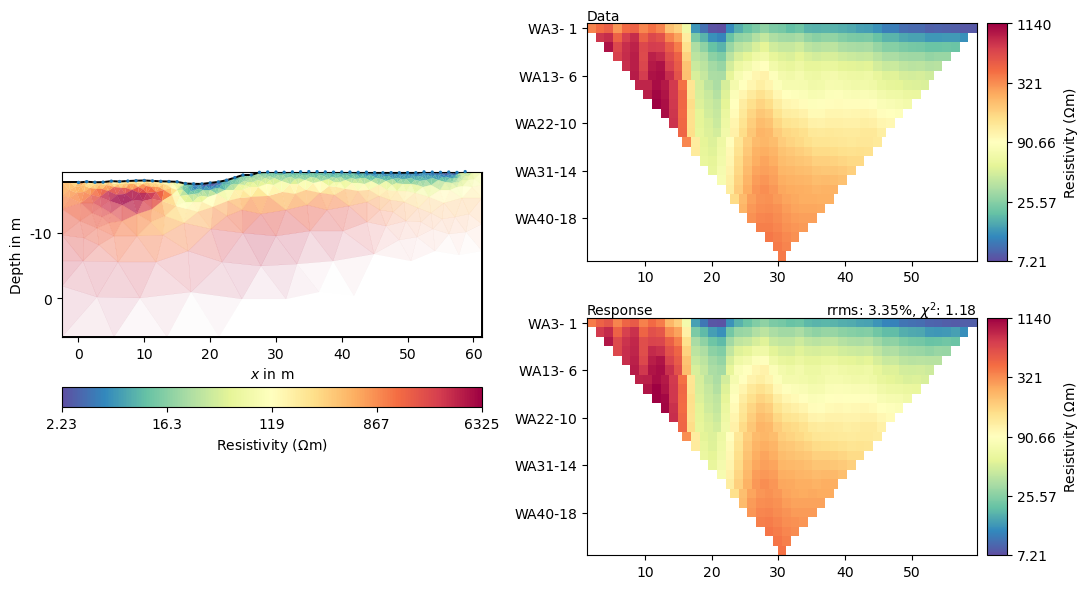

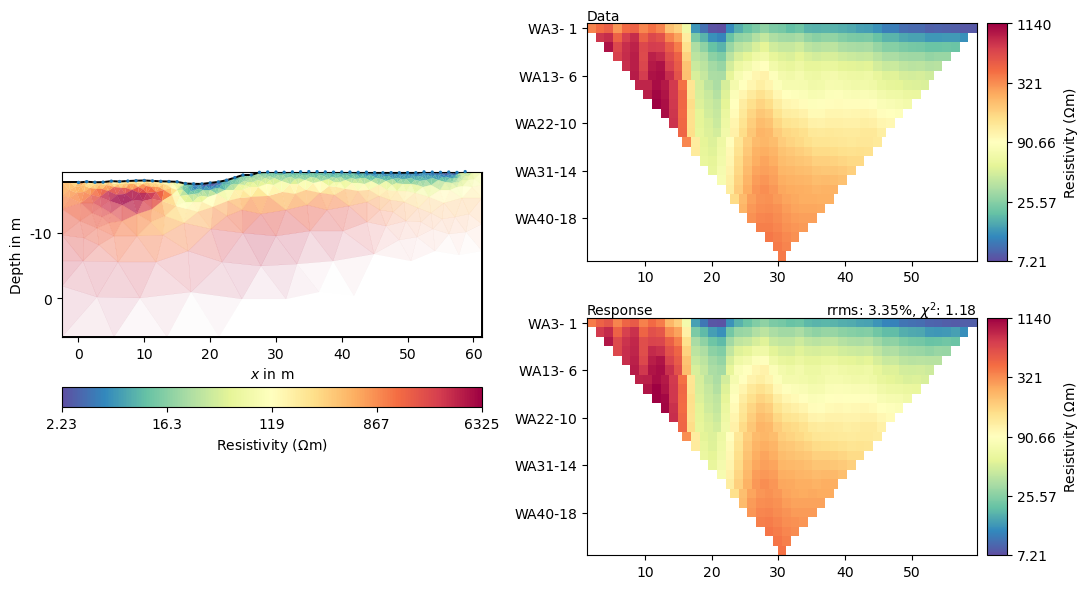

In [220]:
mgr = ert.ERTManager(kamik[2])
mgr.invert(kamik[2], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()

23/09/24 - 13:54:15 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2024august\ERTManager


Path //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2024august\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/k38_ws_2024august\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

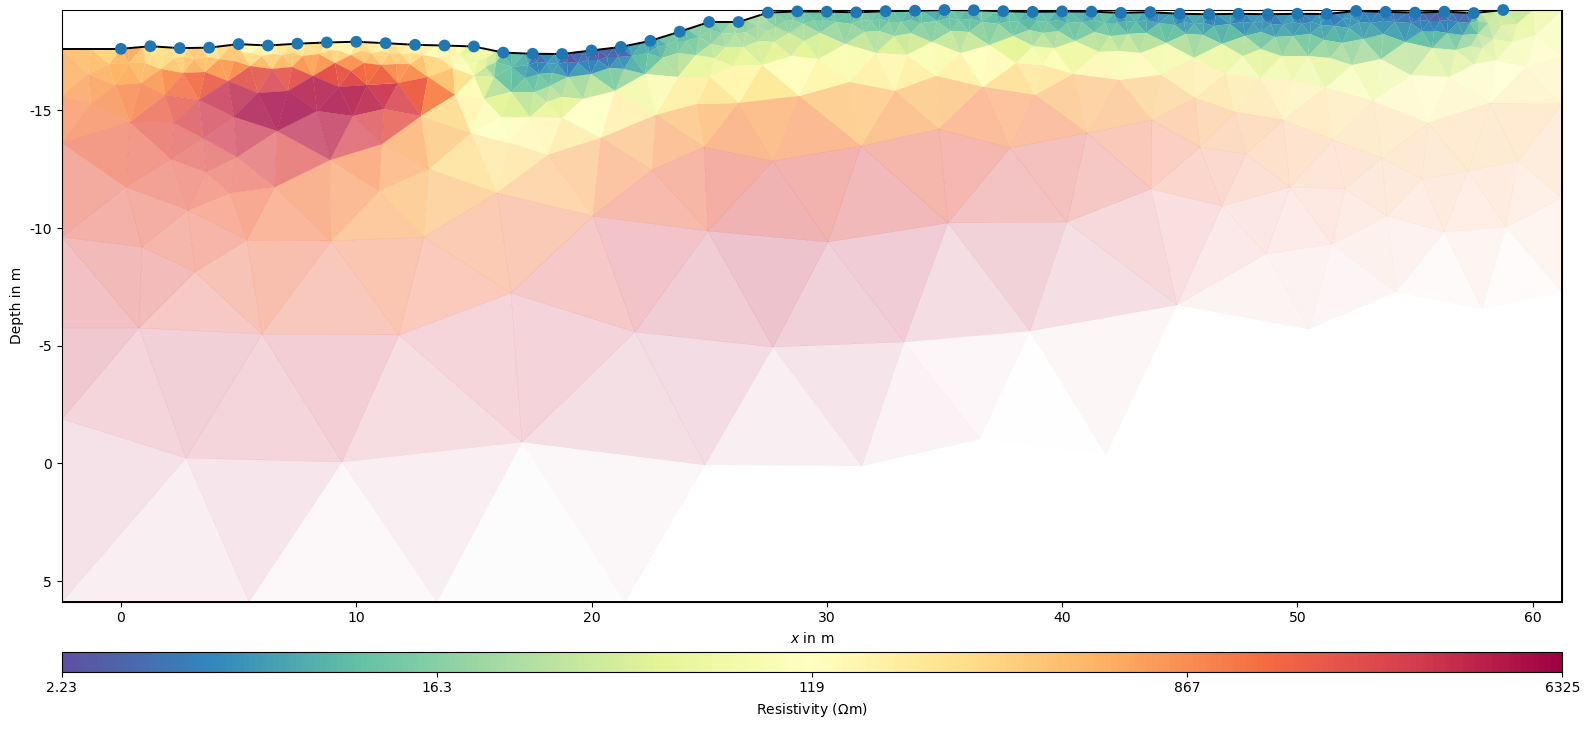

In [221]:
mgr.saveResult(ddir+ 'all_inversions/k38_ws_2024august')

In [222]:
mesh_kamik2023 = pg.load(ddir+'all_inversions/k38_ws_2023/ERTManager/resistivity-pd.bms')
res_kamik2023 = pg.load(ddir+'all_inversions/k38_ws_2023/ERTManager/resistivity.vector')
cov_kamik2023 = pg.load(ddir+'all_inversions/k38_ws_2023/ERTManager/resistivity-cov.vector')

mesh_kamik2024june = pg.load(ddir+'all_inversions/k38_ws_2024june/ERTManager/resistivity-pd.bms')
res_kamik2024june = pg.load(ddir+'all_inversions/k38_ws_2024june/ERTManager/resistivity.vector')
cov_kamik2024june = pg.load(ddir+'all_inversions/k38_ws_2024june/ERTManager/resistivity-cov.vector')

mesh_kamik2024august = pg.load(ddir+'all_inversions/k38_ws_2024august/ERTManager/resistivity-pd.bms')
res_kamik2024august = pg.load(ddir+'all_inversions/k38_ws_2024august/ERTManager/resistivity.vector')
cov_kamik2024august = pg.load(ddir+'all_inversions/k38_ws_2024august/ERTManager/resistivity-cov.vector')

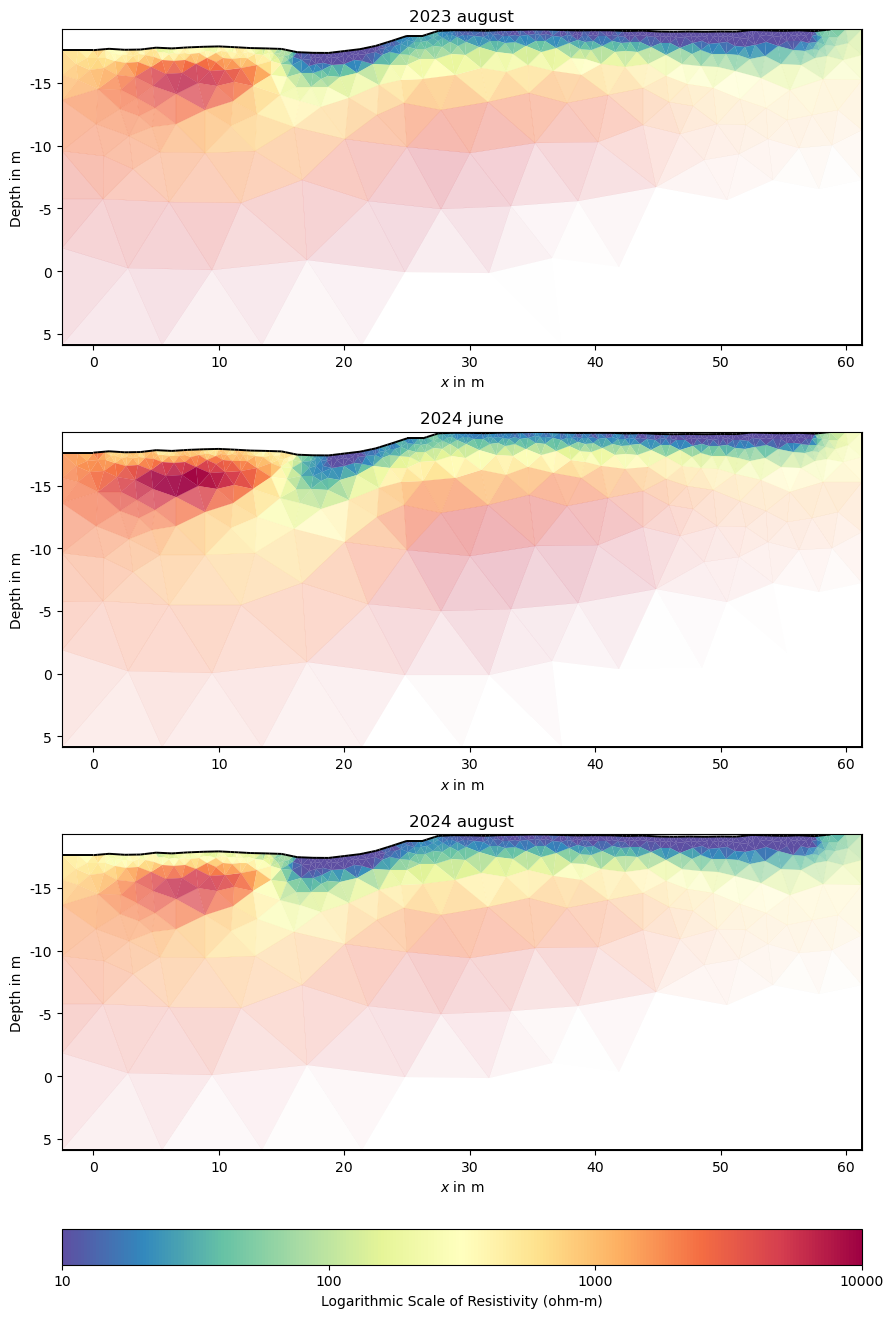

In [223]:
from matplotlib.ticker import LogLocator, LogFormatter



fig, ax = plt.subplots(3, 1, figsize=(10, 18))  
#fig, ax = plt.subplots(1, 2, figsize=(10, 10))

pg.show(mesh_kamik2023, res_kamik2023, logScale=True, cMap="Spectral_r", ax=ax[0], colorBar=False, cMin=10, cMax=10000, coverage=cov_kamik2023, sharex=True)
pg.show(mesh_kamik2024june, res_kamik2024june, logScale=True, cMap="Spectral_r", ax=ax[1], colorBar=False, cMin=10, cMax=10000, coverage=cov_kamik2024june, sharex=True)
pg.show(mesh_kamik2024august, res_kamik2024august, logScale=True, cMap="Spectral_r", ax=ax[2], colorBar=False, cMin=10, cMax=10000, coverage=cov_kamik2024august, sharex=True)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, wspace=0.5) 


cax = fig.add_axes([0.1, 0.15, 0.8, 0.02])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, cMin=10, cMax=10000, logScale=True, cMap="Spectral_r")

cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Logarithmic Scale of Resistivity (ohm-m)', fontsize=10)

ax[0].set_title('2023 august')
ax[1].set_title('2024 june')
ax[2].set_title('2024 august')




plt.show()



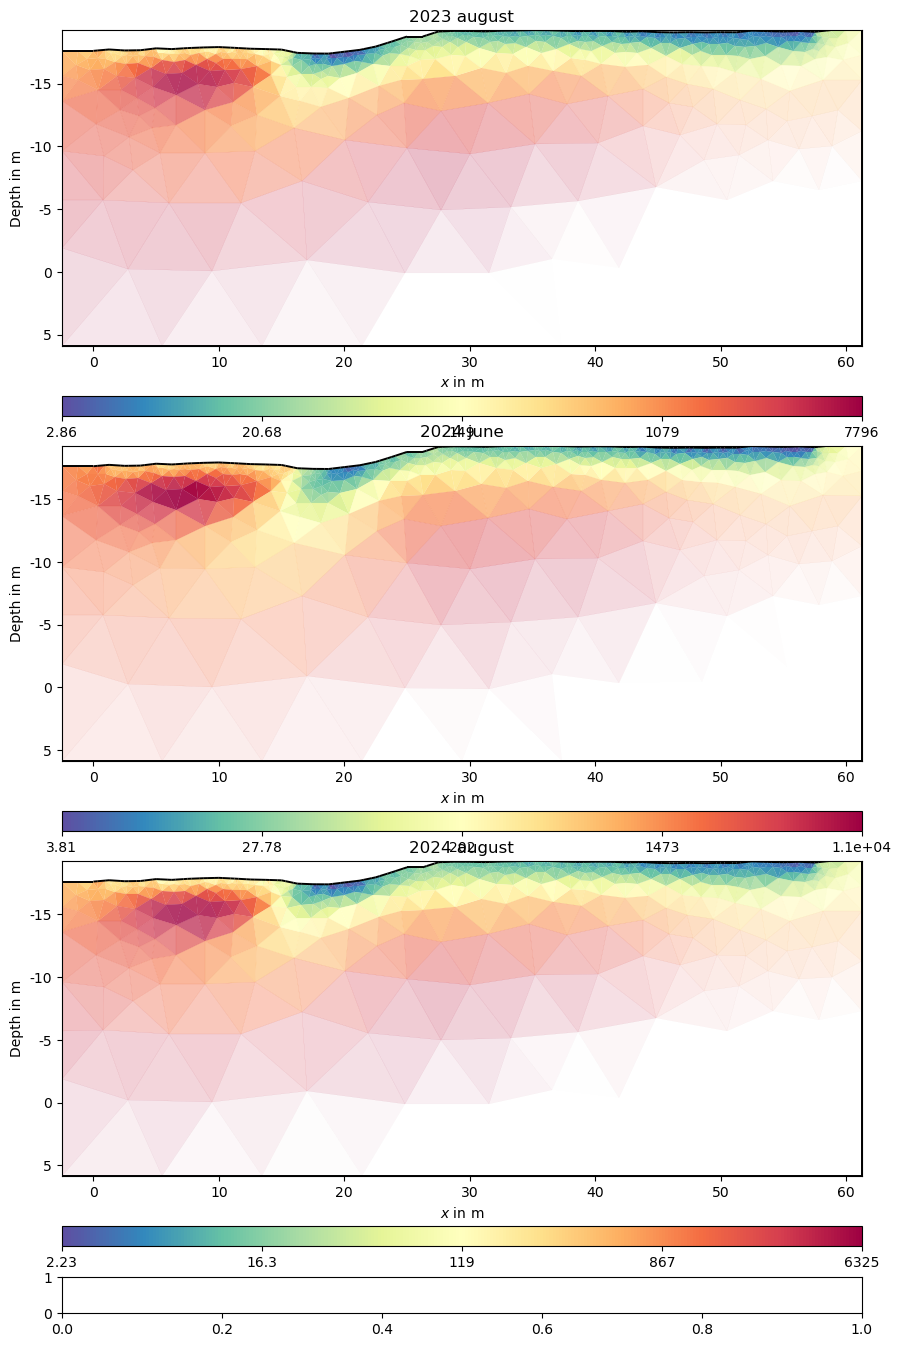

In [54]:
from matplotlib.ticker import LogLocator, LogFormatter



fig, ax = plt.subplots(3, 1, figsize=(10, 18))  
#fig, ax = plt.subplots(1, 2, figsize=(10, 10))

pg.show(mesh_kamik2023, res_kamik2023, logScale=True, cMap="Spectral_r", ax=ax[0], colorBar=True, coverage=cov_kamik2023, sharex=True)
pg.show(mesh_kamik2024june, res_kamik2024june, logScale=True, cMap="Spectral_r", ax=ax[1], colorBar=True, coverage=cov_kamik2024june, sharex=True)
pg.show(mesh_kamik2024august, res_kamik2024august, logScale=True, cMap="Spectral_r", ax=ax[2], colorBar=True, coverage=cov_kamik2024august, sharex=True)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, wspace=0.5) 


cax = fig.add_axes([0.1, 0.15, 0.8, 0.02])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, cMin=10, cMax=10000, logScale=True, cMap="Spectral_r")

cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Logarithmic Scale of Resistivity (ohm-m)', fontsize=10)

ax[0].set_title('2023 august')
ax[1].set_title('2024 june')
ax[2].set_title('2024 august')




plt.show()

23/09/24 - 13:56:55 - pyGIMLi - INFO - Use median(data values)=124.4685
23/09/24 - 13:56:55 - pyGIMLi - INFO - Created startmodel from forward operator: 901, min/max=124.468500/124.468500
23/09/24 - 13:56:55 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000015CAEC6BAB0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000015CA9309670>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000015C6E4A3060>
min/max (data): 9.19/1616
min/max (error): 3%/3.21%
min/max (start model): 124/124
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1400.49
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  173.73 (dPhi = 87.43%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   89.62 (dPhi = 48.56%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   24.53 (dPhi = 72.69%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.63 (dPhi = 92.74%) lam: 2

23/09/24 - 13:57:17 - pyGIMLi - INFO - Starting inversion.
23/09/24 - 13:57:17 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000015CAEC6BAB0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000015CA9309670>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000015C6E4A3530>
min/max (data): 7.21/1140
min/max (error): 3%/3.25%
min/max (start model): 1.87/1.1e+04
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   52.48
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.48 (dPhi = 97.06%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    0.84 (dPhi = 40.79%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.84)                   #
################################################################################


(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x15cb5f79b90>)

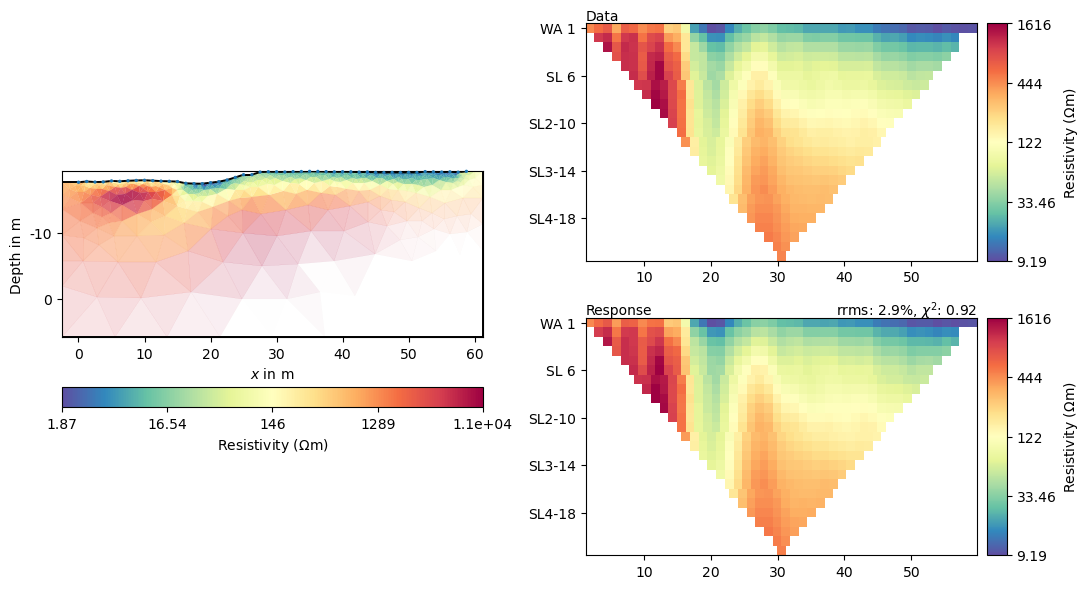

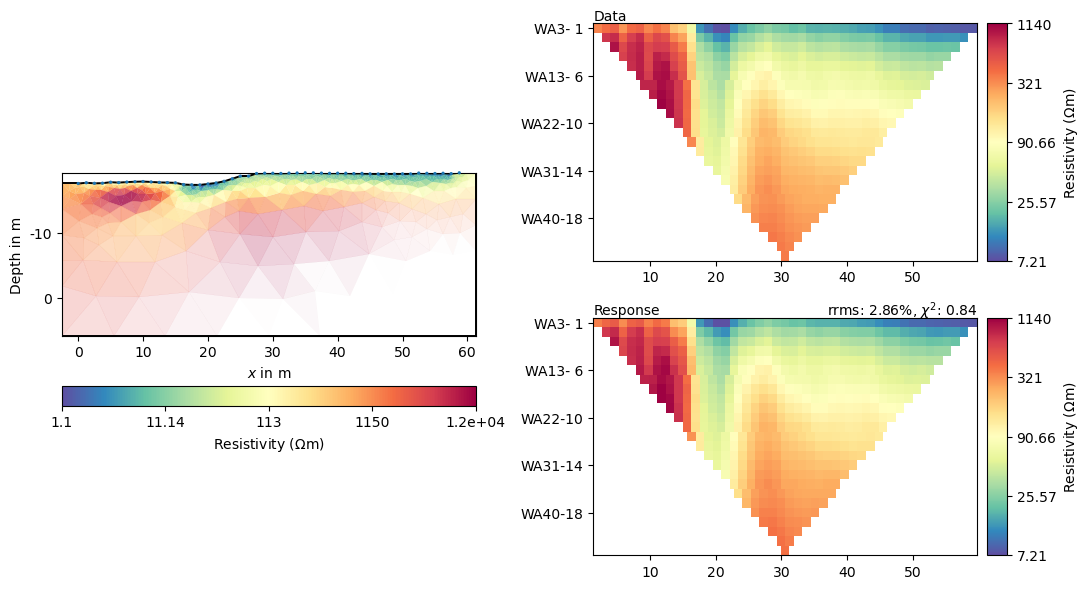

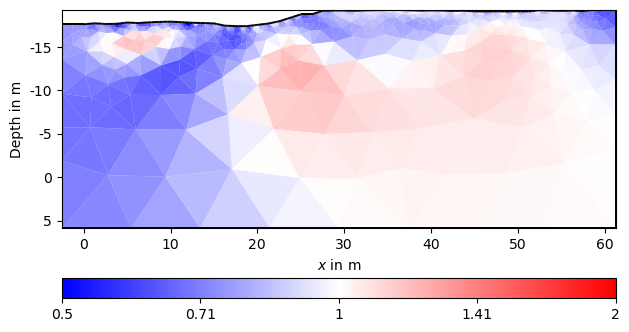

In [226]:
from matplotlib.ticker import LogLocator, LogFormatter

baseline= mgr.invert(kamik[0], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()
timestep1= mgr.invert (kamik[2], verbose=True, startModel=baseline, isReference=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()
ratio = timestep1 / baseline
pg.show(mgr.paraDomain, ratio, cMin=0.5, cMax=2, cMap="bwr", logScale=True)




18/09/24 - 10:32:36 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 20): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\6617233901454837329
18/09/24 - 10:32:36 - pyGIMLi - INFO - Found 2 regions.
18/09/24 - 10:32:36 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
18/09/24 - 10:32:36 - pyGIMLi - INFO - Creating forward mesh from region infos.
18/09/24 - 10:32:36 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
18/09/24 - 10:32:36 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2121 Cells: 3984 Boundaries: 3116
18/09/24 - 10:32:36 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000015C66B17B00>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000015C664950D0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000015C578F6B90>
min/max (data): 9.19/1616
min/max (error): 3%/1.0e+10%
min/max (start model): 100/100
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  789.85
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  109.59 (dPhi = 85.90%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   64.70 (dPhi = 40.86%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   23.17 (dPhi = 63.19%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.59 (dPhi = 87.84%) lam

18/09/24 - 10:32:56 - pyGIMLi - INFO - Starting inversion.


chi² =    0.96 (dPhi = 24.68%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.96)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000015C66B17B00>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000015C664950D0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000015C578F6DC0>
min/max (data): 12.62/2638
min/max (error): 3%/1.0e+10%
min/max (start model): 3.18/1.6e+04
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  155.97
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   18.48 (dPhi = 87.52%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.09 (

18/09/24 - 10:33:12 - pyGIMLi - INFO - Starting inversion.


chi² =    0.65 (dPhi = 20.84%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.65)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000015C66B17B00>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000015C664950D0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000015C578F5B60>
min/max (data): 7.21/1140
min/max (error): 3%/1.0e+10%
min/max (start model): 3.18/1.6e+04
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   26.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.10 (dPhi = 91.63%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    0.52 (d

<Figure size 500x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

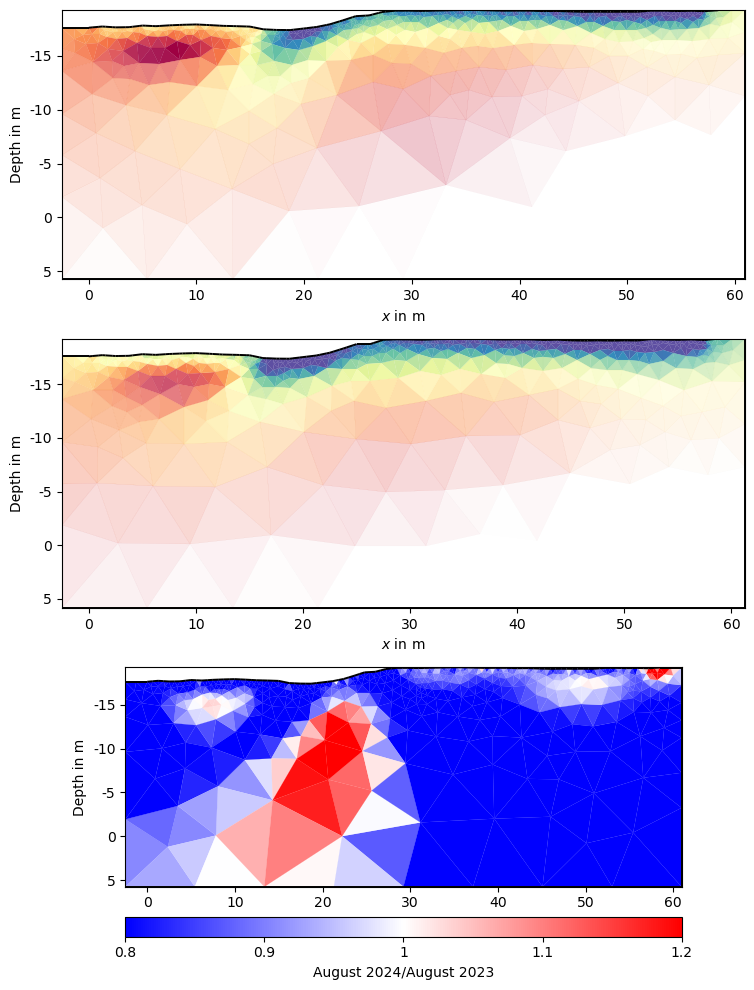

In [23]:
from matplotlib.ticker import LogLocator, LogFormatter



#fig, ax = plt.subplots(3, 1, figsize=(10, 18))  

timeposs=['10/08/2023 12:00','25/06/2024 12:00','16/08/2024 12:00']

dates= [str(datetime.strptime(t, "%d/%m/%Y %H:%M")) for t in timeposs]

timepos= [datetime.fromisoformat(x) for x in dates]

tl = ert.TimelapseERT(kamik, times=timepos)
 
tl.invert(isReference=False, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
tl.generateDataPDF()  # pseudosections
tl.generateModelPDF() # inversions
tl.generateRatioPDF()


fig, zx = plt.subplots(3,1,figsize=(10,10) ) 
zx=zx.ravel()
arg= dict( cMap="bwr", cMin=0.8, cMax=1.2) 


pg.show(mesh_kamik2024june, res_kamik2024june, logScale=True, cMap="Spectral_r", ax=zx[0], colorBar=False, cMin=10, cMax=10000, coverage=cov_kamik2024june, sharex=True)
pg.show(mesh_kamik2024august, res_kamik2024august, logScale=True, cMap="Spectral_r", ax=zx[1], colorBar=False, cMin=10, cMax=10000, coverage=cov_kamik2024august, sharex=True)
pg.show(mgr.paraDomain, ratio, cMin=0.5, cMax=2, cMap="bwr", logScale=True)

#zx[1],col=pg.show(tl.pd,tl.models[2]-tl.models[1], ax=zx[1], pad=0.3, label="August 2024 - June 2024", **arg)
#zx[2],col=pg.show(tl.pd,tl.models[0]-tl.models[1], ax=zx[2], pad=0.3, label="August 2023 - June 2024", **arg)



plt.show()



C:\Users\mealiy001\AppData\Local\Temp\ipykernel_22148\834944608.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_22148\834944608.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_22148\834944608.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])


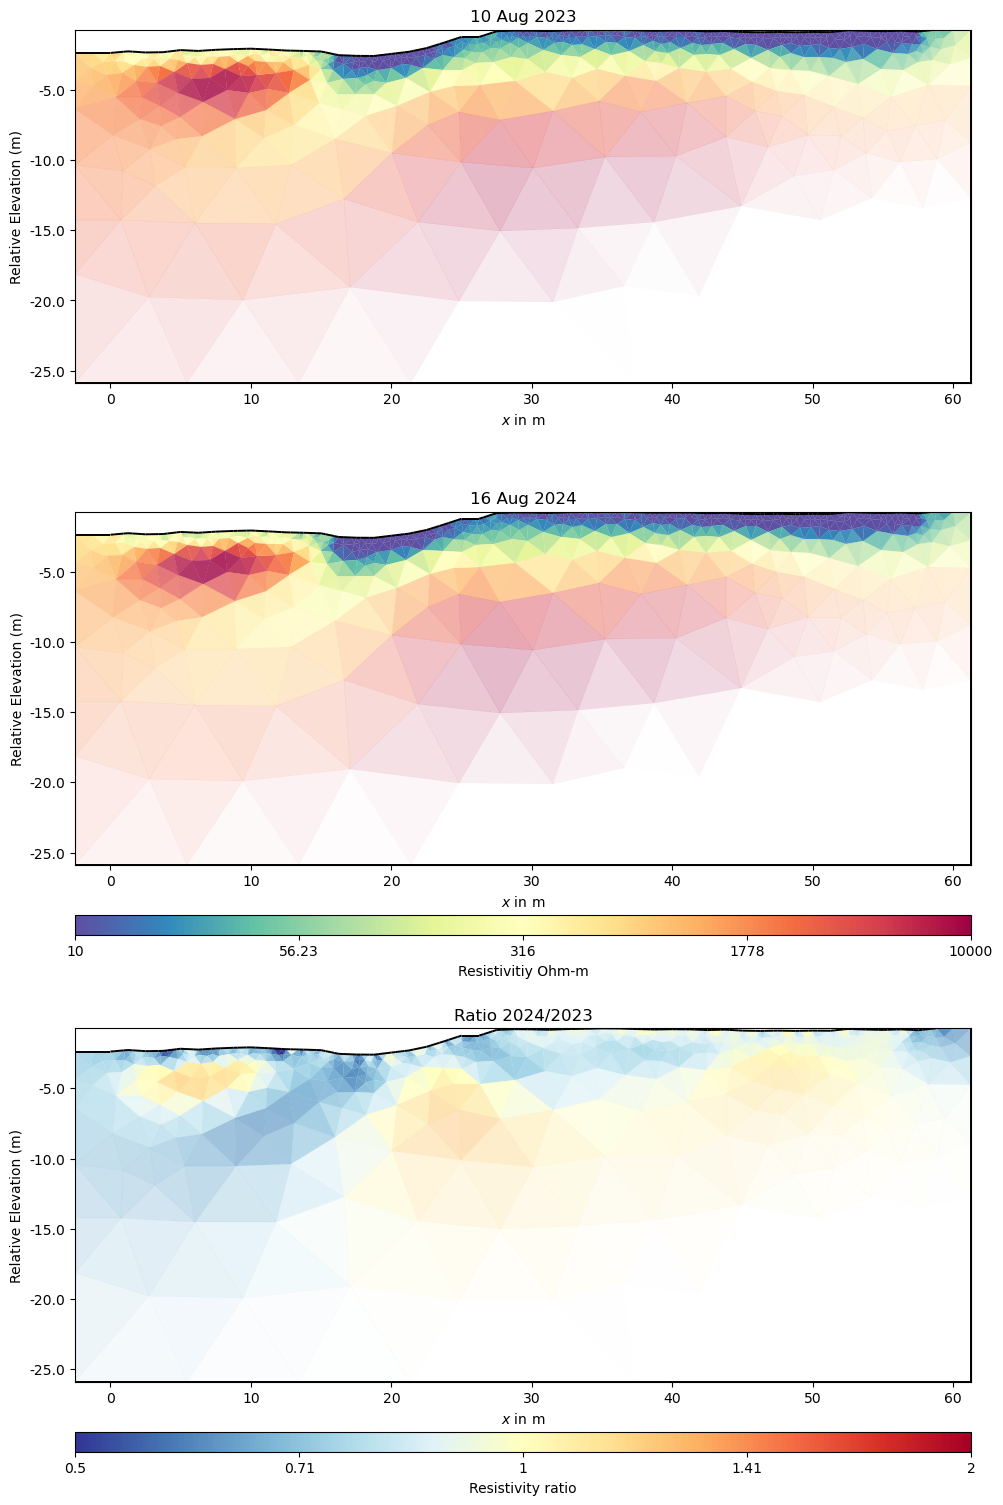

In [227]:
fig, zx = plt.subplots(3,1,figsize=(10,16) ) 
zx=zx.ravel()



pg.show(mgr.paraDomain, baseline, logScale=True, cMap="Spectral_r", ax=zx[0], colorBar=False, cMin=10, cMax=10000, coverage=cov_kamik2023, sharex=True)
pg.show(mgr.paraDomain, timestep1, logScale=True, cMap="Spectral_r", ax=zx[1], colorBar=True, label='Resistivitiy Ohm-m', cMin=10, cMax=10000,  coverage=cov_kamik2024august, sharex=True)
pg.show(mgr.paraDomain, ratio, ax=zx[2], cMin=0.5, cMax=2, cMap="RdYlBu_r", logScale=True, label='Resistivity ratio', coverage=cov_kamik2023)


#zx[1],col=pg.show(tl.pd,tl.models[2]-tl.models[1], ax=zx[1], pad=0.3, label="August 2024 - June 2024", **arg)
#zx[2],col=pg.show(tl.pd,tl.models[0]-tl.models[1], ax=zx[2], pad=0.3, label="August 2023 - June 2024", **arg)

zx[0].set_title('10 Aug 2023')
zx[1].set_title('16 Aug 2024')
zx[2].set_title('Ratio 2024/2023')

# Get the current y-ticks and subtract 17 to show relative elevation
current_ticks = zx[2].get_yticks()
relative_ticks = current_ticks - 20  # Assuming 17 is the minimum elevation

# Set the new tick labels to show relative elevation
for i in range(len(kamik)):
    zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
    zx[i].set_ylabel("Relative Elevation (m)")
#zx[2].set_ylim([0, 25])




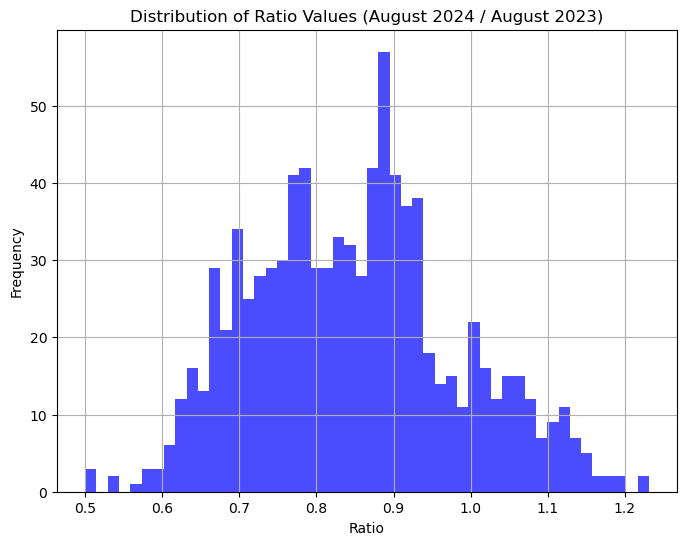

In [228]:
ratio_flat = ratio.array().flatten()
plt.figure(figsize=(8, 6))
plt.hist(ratio_flat, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Ratio Values (August 2024 / August 2023)')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

23/09/24 - 13:58:09 - pyGIMLi - INFO - Starting inversion.
23/09/24 - 13:58:09 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000015CAEC6BAB0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000015CA9309670>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000015CA9010200>
min/max (data): 12.62/2638
min/max (error): 3%/3.16%
min/max (start model): 1.87/1.1e+04
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  298.90
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   10.09 (dPhi = 96.48%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.16 (dPhi = 85.45%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    0.92 (dPhi = 16.50%) lam: 20.0


################################################################################
#                  Abort criterion reached: 

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x15ce32b6c10>)

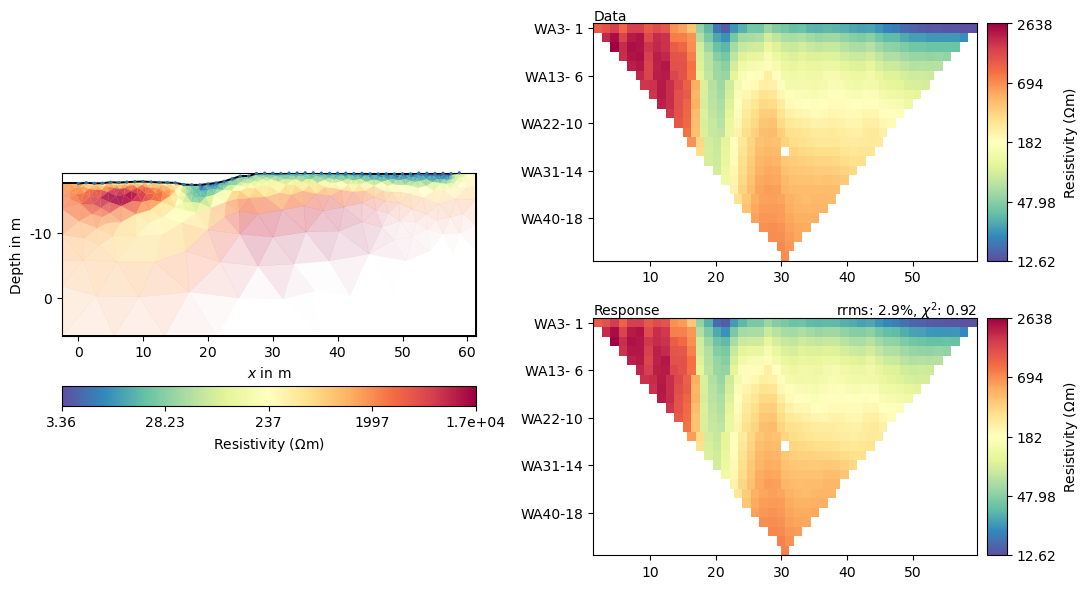

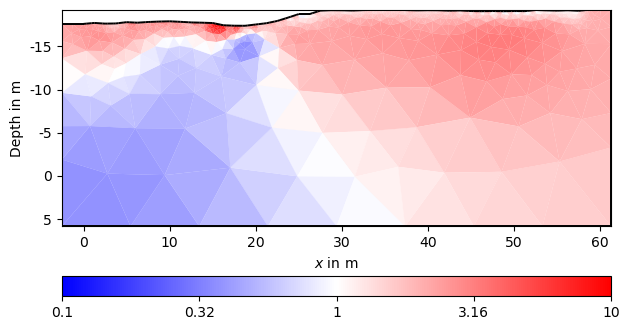

In [229]:
timestep0= mgr.invert (kamik[1], verbose=True, startModel=baseline, isReference=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()
ratio1 = timestep0 / baseline
pg.show(mgr.paraDomain, ratio1, cMin=0.1, cMax=10, cMap="bwr", logScale=True)

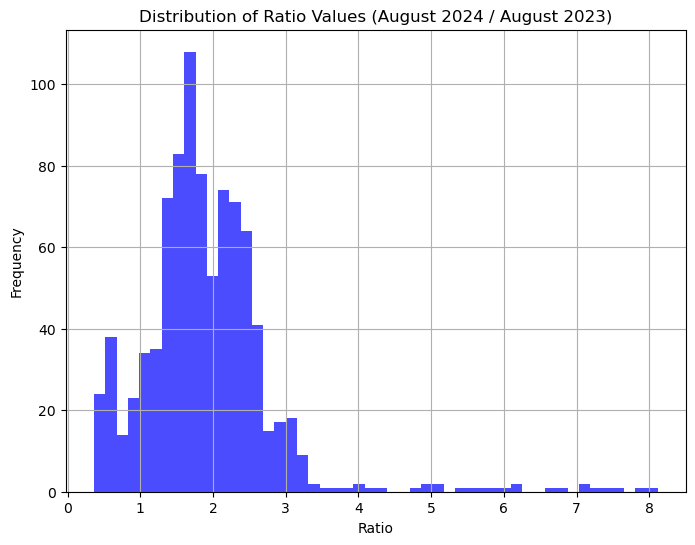

In [230]:
ratio1_flat = ratio1.array().flatten()
plt.figure(figsize=(8, 6))
plt.hist(ratio1_flat, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Ratio Values (August 2024 / August 2023)')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_22148\2763334105.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_22148\2763334105.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_22148\2763334105.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])


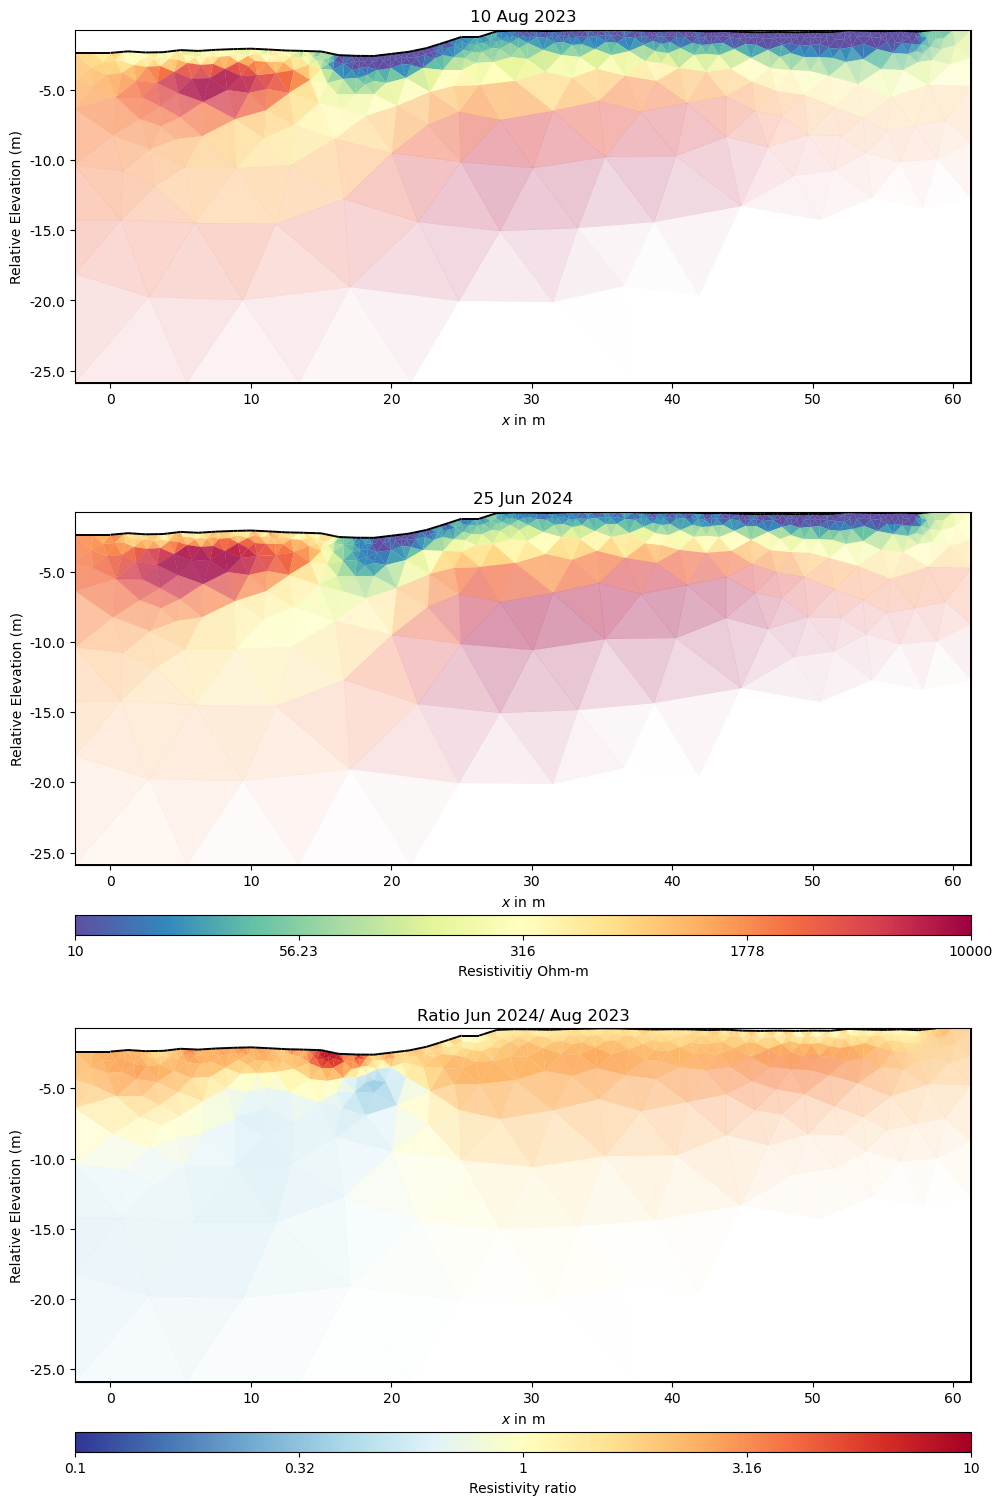

In [231]:
fig, zx = plt.subplots(3,1,figsize=(10,16) ) 
zx=zx.ravel()



pg.show(mgr.paraDomain, baseline, logScale=True, cMap="Spectral_r", ax=zx[0], colorBar=False, cMin=10, cMax=10000, coverage=cov_kamik2023, sharex=True)
pg.show(mgr.paraDomain, timestep0, logScale=True, cMap="Spectral_r", ax=zx[1], colorBar=True, label='Resistivitiy Ohm-m', cMin=10, cMax=10000, coverage=cov_kamik2024august, sharex=True)
pg.show(mgr.paraDomain, ratio1, ax=zx[2], cMin=0.1, cMax=10, cMap="RdYlBu_r", logScale=True, label='Resistivity ratio', coverage=cov_kamik2023)

zx[0].set_title('10 Aug 2023')
zx[1].set_title('25 Jun 2024')
zx[2].set_title('Ratio Jun 2024/ Aug 2023')

# Get the current y-ticks and subtract 17 to show relative elevation
current_ticks = zx[2].get_yticks()
relative_ticks = current_ticks - 20  # Assuming 17 is the minimum elevation

# Set the new tick labels to show relative elevation
for i in range(len(kamik)):
    zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
    zx[i].set_ylabel("Relative Elevation (m)")

#zx[1],col=pg.show(tl.pd,tl.models[2]-tl.models[1], ax=zx[1], pad=0.3, label="August 2024 - June 2024", **arg)
#zx[2],col=pg.show(tl.pd,tl.models[0]-tl.models[1], ax=zx[2], pad=0.3, label="August 2023 - June 2024", **arg)



plt.show()

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x15ce361edd0>)

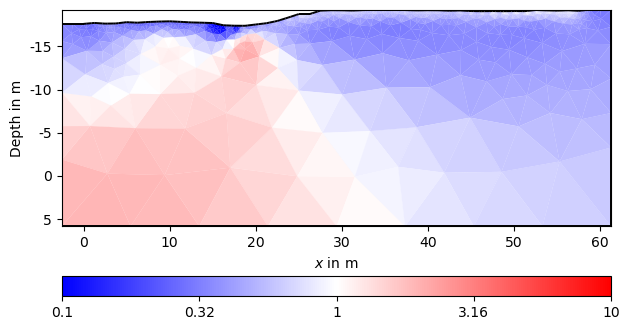

In [232]:

ratio2 = timestep1 / timestep0
pg.show(mgr.paraDomain, ratio2, cMin=0.1, cMax=10, cMap="bwr", logScale=True)

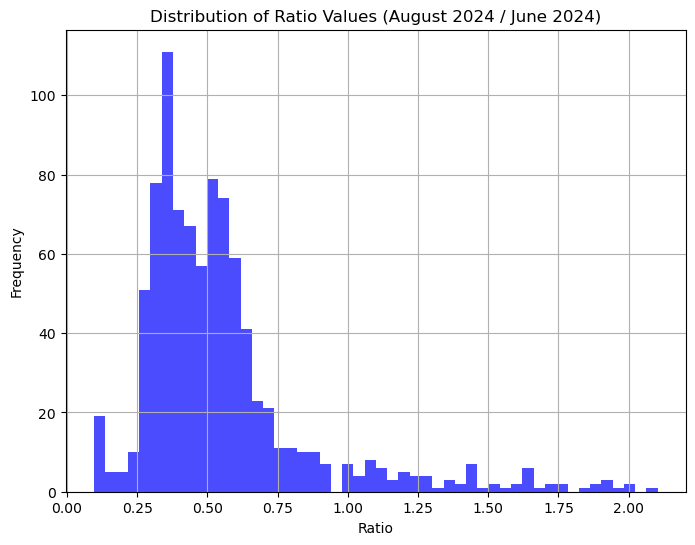

In [233]:
ratio2_flat = ratio2.array().flatten()
plt.figure(figsize=(8, 6))
plt.hist(ratio2_flat, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Ratio Values (August 2024 / June 2024)')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_22148\620612460.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_22148\620612460.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_22148\620612460.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])


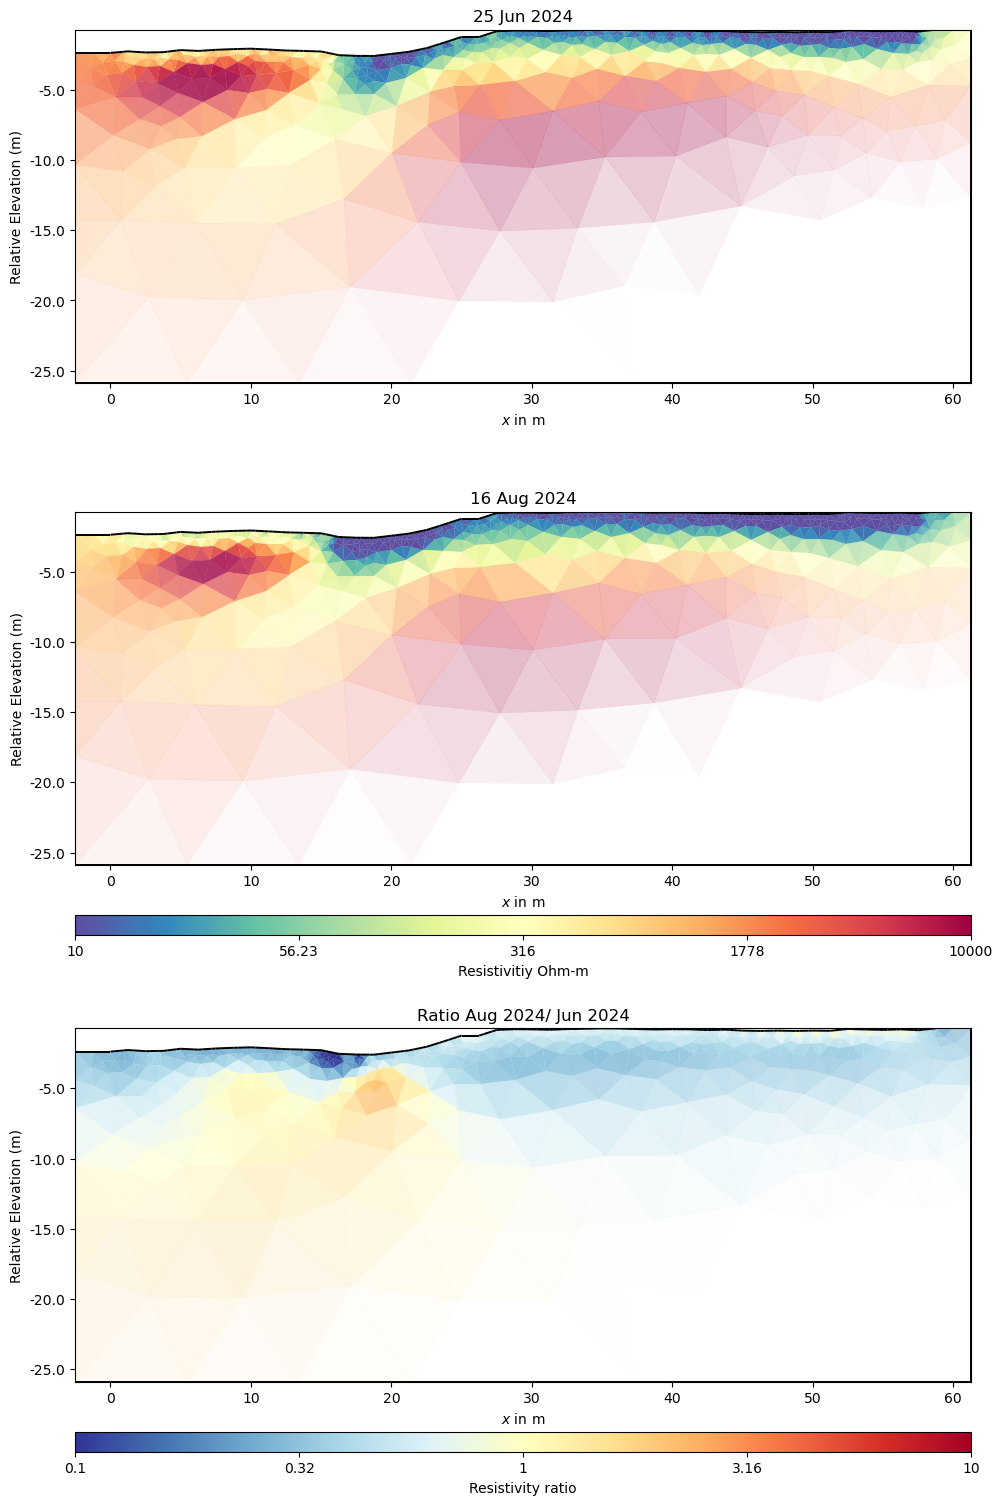

In [234]:
fig, zx = plt.subplots(3,1,figsize=(10,16) ) 
zx=zx.ravel()



pg.show(mgr.paraDomain, timestep0, logScale=True, cMap="Spectral_r", ax=zx[0], colorBar=False, cMin=10, cMax=10000, coverage=cov_kamik2023, sharex=True)
pg.show(mgr.paraDomain, timestep1, logScale=True, cMap="Spectral_r", ax=zx[1], colorBar=True, label='Resistivitiy Ohm-m', cMin=10, cMax=10000, coverage=cov_kamik2024august, sharex=True)
pg.show(mgr.paraDomain, ratio2, ax=zx[2], cMin=0.1, cMax=10, cMap="RdYlBu_r", logScale=True, label='Resistivity ratio', coverage=cov_kamik2023)

zx[0].set_title('25 Jun 2024')
zx[1].set_title('16 Aug 2024')
zx[2].set_title('Ratio Aug 2024/ Jun 2024')

# Get the current y-ticks and subtract 17 to show relative elevation
current_ticks = zx[2].get_yticks()
relative_ticks = current_ticks - 20  # Assuming 17 is the minimum elevation

# Set the new tick labels to show relative elevation
for i in range(len(kamik)):
    zx[i].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
    zx[i].set_ylabel("Relative Elevation (m)")

#zx[1],col=pg.show(tl.pd,tl.models[2]-tl.models[1], ax=zx[1], pad=0.3, label="August 2024 - June 2024", **arg)
#zx[2],col=pg.show(tl.pd,tl.models[0]-tl.models[1], ax=zx[2], pad=0.3, label="August 2023 - June 2024", **arg)



(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x15ca1f32350>)

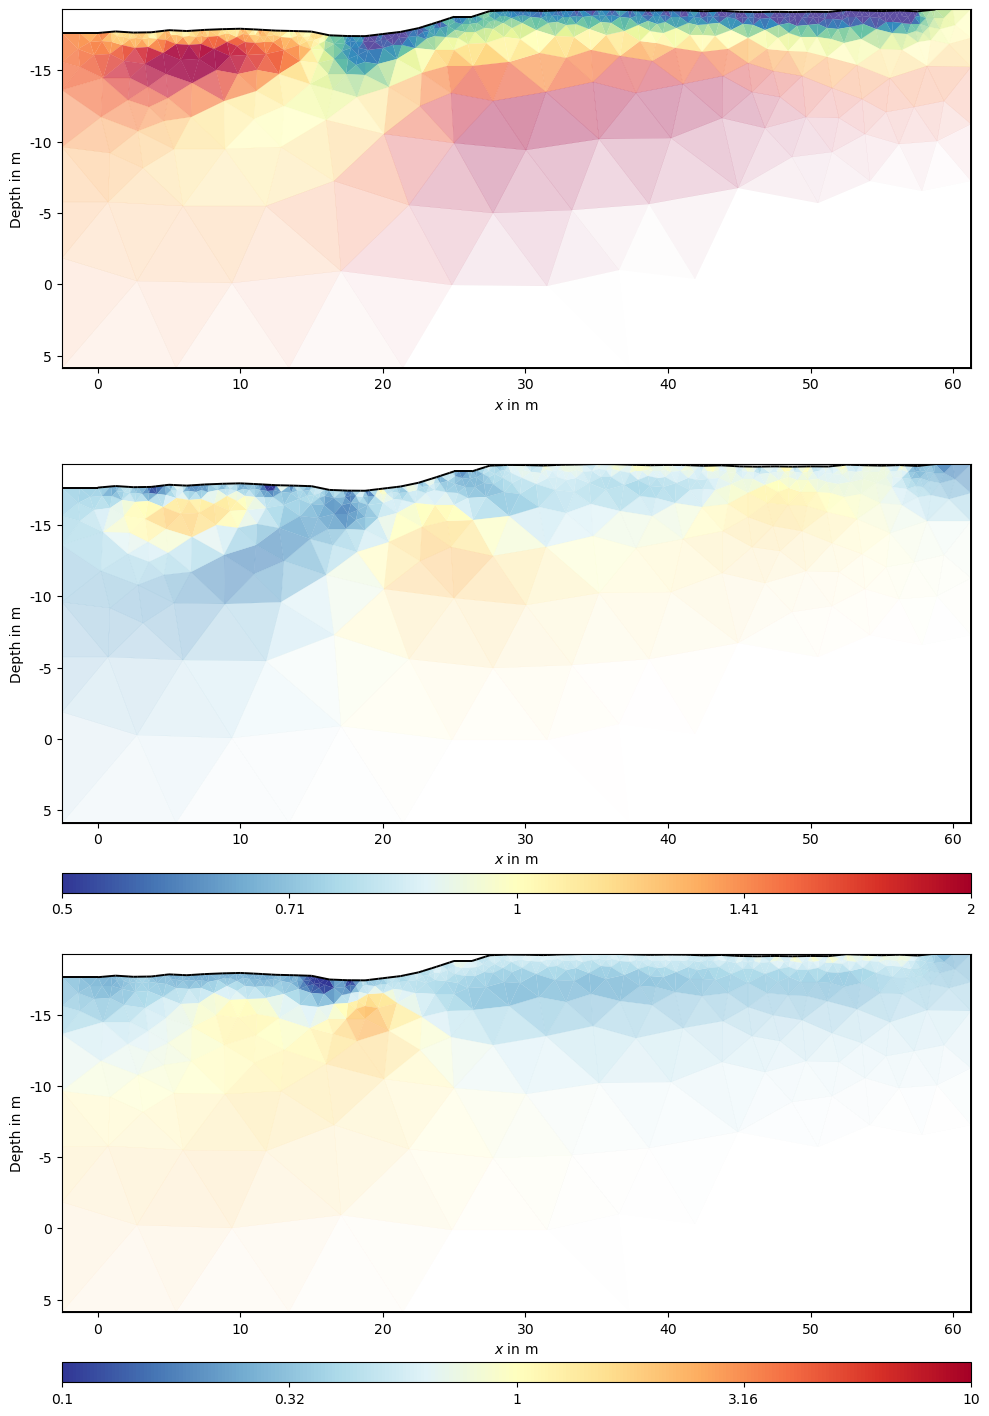

In [235]:
fig, zx = plt.subplots(3,1,figsize=(10,15) ) 
zx=zx.ravel()



pg.show(mgr.paraDomain, timestep0, logScale=True, cMap="Spectral_r", ax=zx[0], colorBar=False, cMin=10, cMax=10000, coverage=cov_kamik2023, sharex=True)
pg.show(mgr.paraDomain, ratio, ax=zx[1], cMin=0.5, cMax=2, cMap="RdYlBu_r", logScale=True, coverage=cov_kamik2023)
pg.show(mgr.paraDomain, ratio2, ax=zx[2], cMin=0.1, cMax=10, cMap="RdYlBu_r", logScale=True, coverage=cov_kamik2023)


#zx[1],col=pg.show(tl.pd,tl.models[2]-tl.models[1], ax=zx[1], pad=0.3, label="August 2024 - June 2024", **arg)
#zx[2],col=pg.show(tl.pd,tl.models[0]-tl.models[1], ax=zx[2], pad=0.3, label="August 2023 - June 2024", **arg)